In [2]:
import time
import ollama
import matplotlib.pyplot as plt
import os

In [3]:
# Force Ollama to use GPU
os.environ["OLLAMA_USE_GPU"] = "1"

# List of DeepSeek R1 models to test
models = ["deepseek-r1:1.5b", "deepseek-r1:7b"]

# Number of prompts to test
num_prompts = [1, 5, 10, 15, 20]

# Sample prompt
prompt = "Hi"

# Dictionary to store response times
response_times = {model: [] for model in models}

# Run tests
for model in models:
    print(f"Testing model: {model}")
    for n in num_prompts:
        start_time = time.time()
        for _ in range(n):
            _ = ollama.chat(model=model, messages=[{"role": "user", "content": prompt}])
        end_time = time.time()

        avg_time = (end_time - start_time) / n  # Average response time per prompt
        response_times[model].append(avg_time)
        print(f"  Prompts: {n}, Avg Response Time: {avg_time:.2f} sec")

Testing model: deepseek-r1:1.5b
  Prompts: 1, Avg Response Time: 2.45 sec
  Prompts: 5, Avg Response Time: 0.29 sec
  Prompts: 10, Avg Response Time: 0.29 sec
  Prompts: 15, Avg Response Time: 0.28 sec
  Prompts: 20, Avg Response Time: 0.29 sec
Testing model: deepseek-r1:7b
  Prompts: 1, Avg Response Time: 15.15 sec
  Prompts: 5, Avg Response Time: 3.52 sec
  Prompts: 10, Avg Response Time: 3.50 sec
  Prompts: 15, Avg Response Time: 3.49 sec
  Prompts: 20, Avg Response Time: 3.52 sec


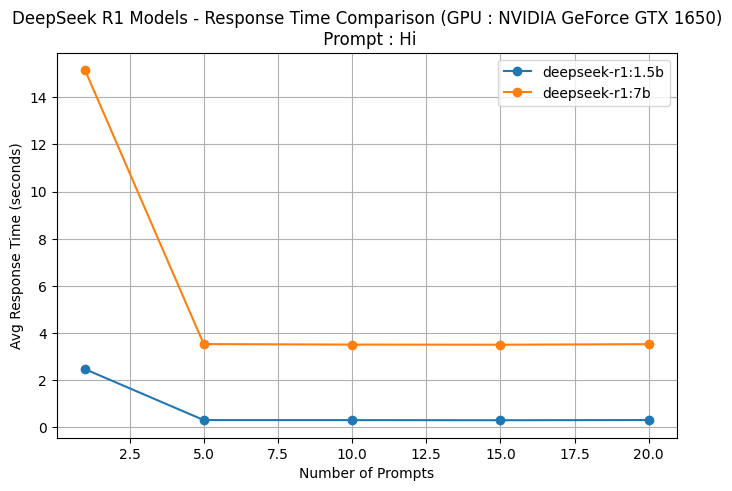

In [4]:
# Plot the results
plt.figure(figsize=(8, 5))
for model, times in response_times.items():
    plt.plot(num_prompts, times, marker='o', label=model)

plt.xlabel("Number of Prompts")
plt.ylabel("Avg Response Time (seconds)")
plt.title("DeepSeek R1 Models - Response Time Comparison (GPU : NVIDIA GeForce GTX 1650)\n Prompt : Hi")
plt.legend()
plt.grid()
plt.show()